
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

from src import funciones as f

In [9]:
montaje=pd.read_csv("datos/linea_montaje.csv")
fluidos=pd.read_csv("datos/densidad_fluidos.csv")

#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes.  Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación. 


1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [10]:
montaje.head(2)

,minutos,metodo
0,4.166484,A
1,4.887466,A


## EDA


No hay nulos ni duplicados en ninguno de los conjuntos de datos.   
  

***Linea de montaje:***  

- El método más usado es el método A con una frecuencia de 50 (Aunque realmente es porque ordena alfabeticamente porque si hay 3 métodos y 150 en total dan a 50 cada uno)  
  
- El tiempo medio de producción de un producto es de casi 5 minutos por producto. Al observar el mínimo observamos tiempo de producción unitario negativo lo que se debe a paradas de producción con lo que los tendrémos que mantener.  
  
***Densidad de fluidos:***   
  

- La temperatura media es 137,5 grados con una desviación de casi 28 grados.

- La densidad media es de 21,72 con una desviación muy leve  
  




LA INDEPENDENCIA YA SE DA POR SUPUESTA GRACIAS A QUE NOS HAN DICHO QUE SE SELECCIONAN ALEATORIAMENTE.

In [14]:
montaje.describe(include="O").T

,count,unique,top,freq
metodo,150,3,A,50


In [12]:
montaje.describe().T

,count,mean,std,min,25%,50%,75%,max
minutos,150.0,4.895103,2.222707,-0.818899,3.528356,4.870153,6.328776,12.059491


In [13]:
montaje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   minutos  150 non-null    float64
 1   metodo   150 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [19]:
montaje.duplicated().sum()

np.int64(0)

In [18]:
fluidos.head(2)

,temperatura,densidad
0,100,21.790655
1,100,21.725900


In [16]:
fluidos.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatura,400.0,137.500000,27.985854,100.000000,118.75000,137.500000,156.250000,175.000000
densidad,400.0,21.733028,0.169214,21.323342,21.61463,21.742521,21.843457,22.170432


In [17]:
fluidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  400 non-null    int64  
 1   densidad     400 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.4 KB


In [20]:
fluidos.duplicated().sum()

np.int64(0)

1. ¿Se verifican los supuestos del modelo de análisis de la varianza?


In [74]:
normalizale = montaje["minutos"]
loc, scale = stats.norm.fit(normalizale) # Normalizamos para que devuelva un p-value 
_, p_value = stats.kstest(normalizale, 'norm',args=(loc,scale))
resultado = p_value > 0.05
print(f"los minutos en general siguen una distribución normal según el test de Kolmogorov-Smirnov.{resultado}")

los minutos en general siguen una distribución normal según el test de Kolmogorov-Smirnov.True


In [76]:
lista_metodos= montaje["metodo"].unique().tolist()


for indice, metodo in enumerate(lista_metodos):
    normalizale = montaje[montaje["metodo"] == metodo]["minutos"]
    loc, scale = stats.norm.fit(normalizale) # Normalizamos para que devuelva un p-value 
    _, p_value = stats.kstest(normalizale, 'norm',args=(loc,scale))
    resultado = p_value > 0.05
    print(f"los minutos en {metodo} siguen una distribución normal según el test de Kolmogorov-Smirnov.{resultado}")

los minutos en A siguen una distribución normal según el test de Kolmogorov-Smirnov.True
los minutos en B siguen una distribución normal según el test de Kolmogorov-Smirnov.True
los minutos en C siguen una distribución normal según el test de Kolmogorov-Smirnov.True


<Axes: xlabel='minutos', ylabel='Count'>

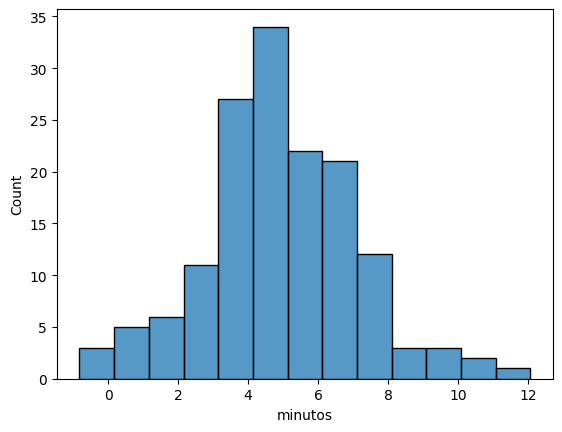

In [ ]:
sns.histplot(x="minutos", data= montaje)

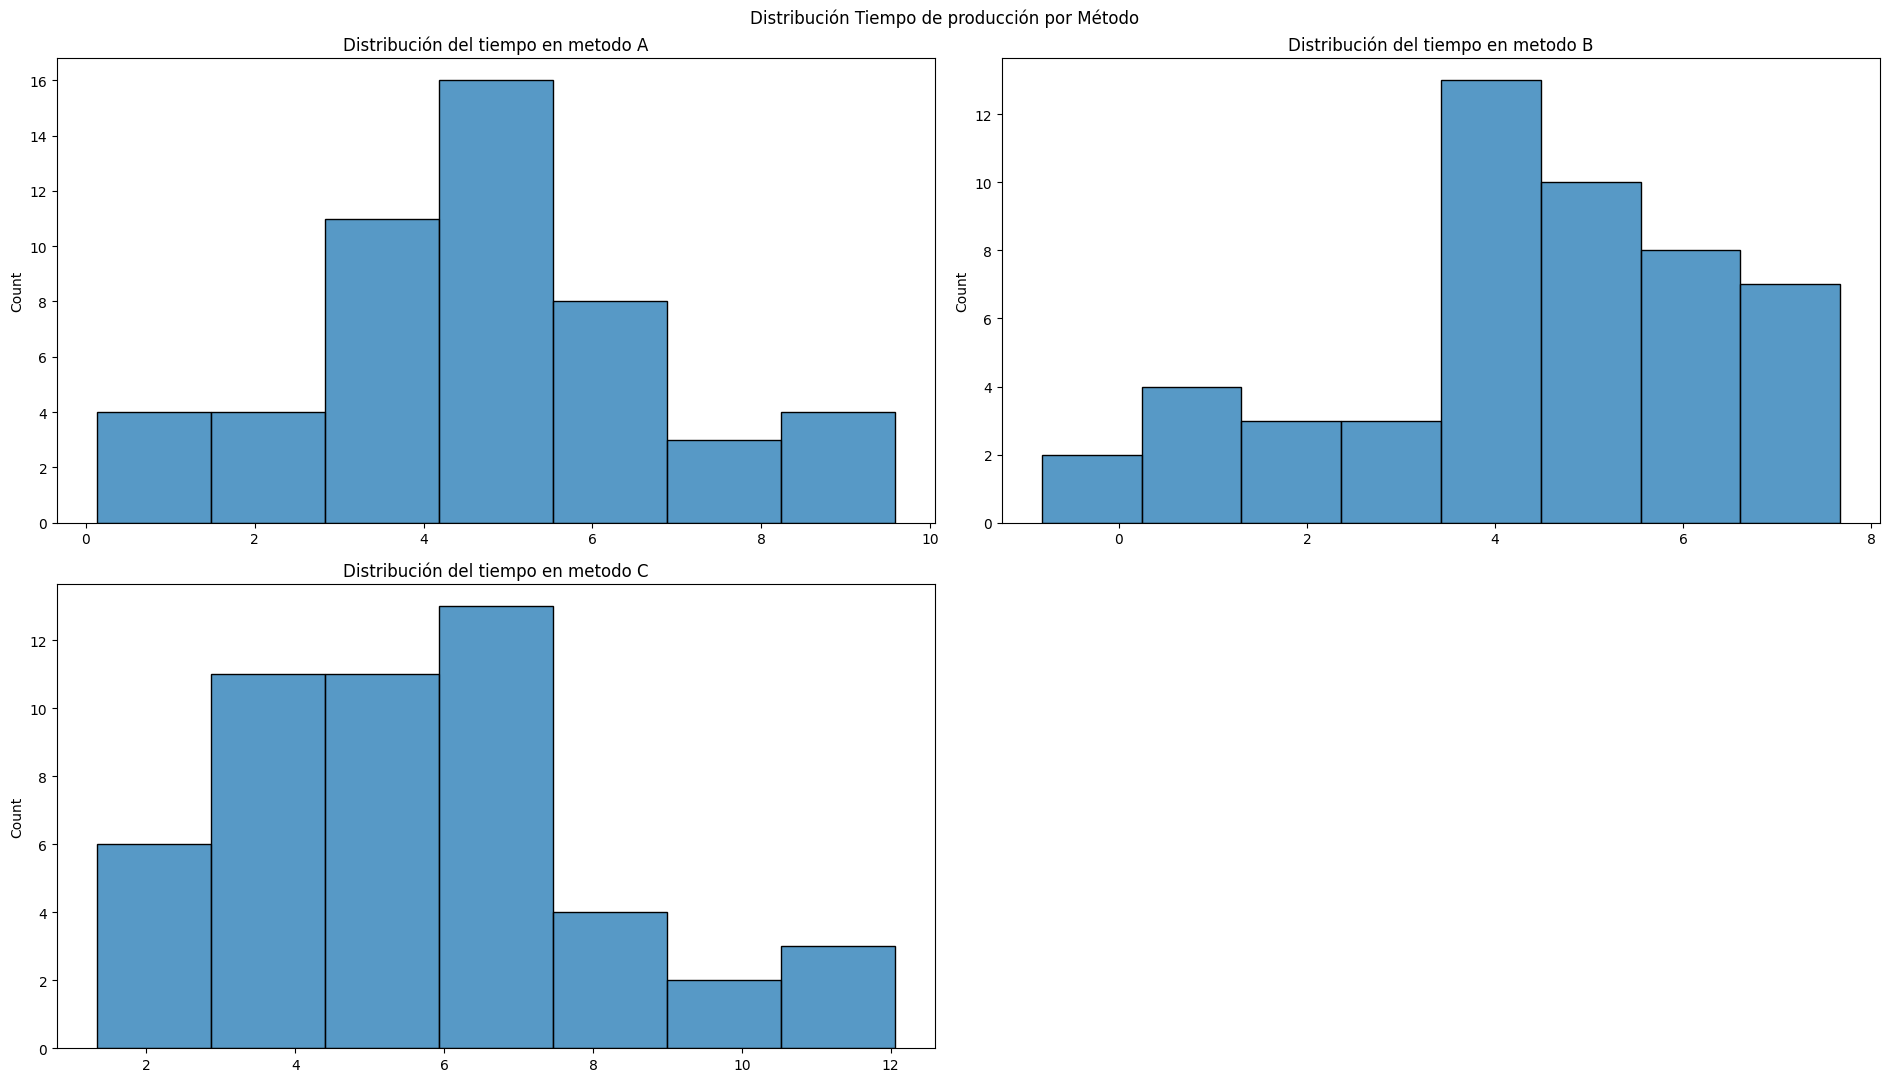

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 11))
axes = axes.flat  #Esto es para solo tener que meter un indice en lugar de dos (me lo hace de segido pero me lo sigue enseñando en 4x4)
lista_metodos= montaje["metodo"].unique().tolist()


for indice, metodo in enumerate(lista_metodos):
    sns.histplot(x="minutos", data= montaje[montaje["metodo"]== metodo], ax=axes[indice])
    axes[indice].set_title(f"Distribución del tiempo en metodo {metodo}")
    axes[indice].set_xlabel("")



if len(lista_metodos) % 2 != 0:
    fig.delaxes(axes[-1])           #esto es por si es un número impar de columnas para eliminar la que se quedaría vacía 

fig.suptitle("Distribución Tiempo de producción por Método")
plt.tight_layout()
plt.show()

*Analizado de forma conjunta:*  
  

Dado que el p-value > 0,05 , no hay evidencia suficiente para rechazar la hipótesis nula. Esto quiere decir (dado que nuestra hipótesis nula es que la distribución sea normal) que la distribución de los minutos es normal. Ahora que lo sabemos, procededmos a comprobar la homocedasticidad con el test de levene.


*Individual:*  
 
  
Dado que el p-value > 0,05 , no hay evidencia suficiente para rechazar la hipótesis nula. Esto quiere decir (dado que nuestra hipótesis nula es que la distribución sea normal) que la distribución de los minutos es normal para todos los métodos. Ahora que lo sabemos, procededmos a comprobar la homocedasticidad con el test de levene.


In [78]:

unicos=montaje["metodo"].unique()   #lista de grupos
for grupo in unicos:
    montaje_metrica= montaje[montaje["metodo"]== grupo]["minutos"]
    globals()[grupo] = montaje_metrica                                   #globals permite poner un parametro de una funcion en la variable a definir (de normal no se puede)
                                                                    #basicamente el globals lo empaqueta en un especie de diccionario en la que lo unico que se almacena en unicos (lista_grupo) son los nombres A B y C


print(stats.levene(*[globals()[var] for var in unicos]))                  #al desempaquetar, de la A obtenemos sus estadisticos el * es para quitar la lista


LeveneResult(statistic=np.float64(0.5121686332045056), pvalue=np.float64(0.6002599830733366))


o lo que es lo mismo:

In [79]:
stats.levene(montaje[montaje["metodo"]== "C"]["minutos"], montaje[montaje["metodo"]== "A"]["minutos"], montaje[montaje["metodo"]== "B"]["minutos"])

LeveneResult(statistic=np.float64(0.5121686332045056), pvalue=np.float64(0.6002599830733366))

Dado que el p-value > 0,05 , no hay evidencia suficiente para rechazar la hipótesis nula. Esto quiere decir que la distribución de los minutos es homocedástica.


2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?


In [80]:
#Aqui supongo que tengo que hacer un anova ya que tengo que hacer un contraste de hipotesis de 3 

unicos=montaje["metodo"].unique()   #lista de grupos
for grupo in unicos:
    montaje_metrica= montaje[montaje["metodo"]== grupo]["minutos"]
    globals()[grupo] = montaje_metrica                                  

print(stats.f_oneway(*[globals()[var] for var in unicos]))                 


F_onewayResult(statistic=np.float64(4.275128289148849), pvalue=np.float64(0.015679251126397998))


Dado que el p-value es < 0,05 , no hay evidencia suficiente para aceptar la hipótesis nula (Nuestra hipótesis nula es que la diferencia en el tiempo medio de los tres métodods era = 0). Por ello podemos decir que si que existen diferencias en los tiempos de producción medios en los productos dependiendo del método de producción.


3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [30]:
#ahora vamos a utilizar una t- student porque vamos a comprara métodos de 2 en 2.
print(stats.ttest_ind(montaje[montaje["metodo"]== "C"]["minutos"], montaje[montaje["metodo"]== "A"]["minutos"]))       
print(stats.ttest_ind(montaje[montaje["metodo"]== "C"]["minutos"], montaje[montaje["metodo"]== "B"]["minutos"])) 
print(stats.ttest_ind(montaje[montaje["metodo"]== "B"]["minutos"], montaje[montaje["metodo"]== "A"]["minutos"]))

TtestResult(statistic=np.float64(1.9822369728858387), pvalue=np.float64(0.05025304295700147), df=np.float64(98.0))
TtestResult(statistic=np.float64(2.7945789450116494), pvalue=np.float64(0.006252328381189883), df=np.float64(98.0))
TtestResult(statistic=np.float64(-0.8500751462606051), pvalue=np.float64(0.3973553695139316), df=np.float64(98.0))


Tanto en la hipotesis nula del primer contraste (C y A) como en el segundo (C y B) el p-value es < a 0,05 lo que significa que no hay evidencia suficiente para aceptar la Ho, es decir, que si que hay diferencias en los tiempos de prodcucción unitarios entre esos métodos. Mientras que en el caso restante(B y A) no hay evidencia suficiente para poder rechazar la Ho lo que significa que no podemos afirmar que haya diferencias en los tiempos medios de producción entre esos dos métodos. Gracias al gráfico, sacamos que el C es diferente pero no porque tarde menos sino porque tarda más lo que nos deja solo con la opción A o la opción B pero una vez más dado que el método B tiene valores negativos debido a paradas de producción, nos quedaríamos con que el método A sería el más optimo en cuanto al tiempo unitario medio de producción.

Text(0.5, 1.0, 'Minutos medios que tarda cada método')

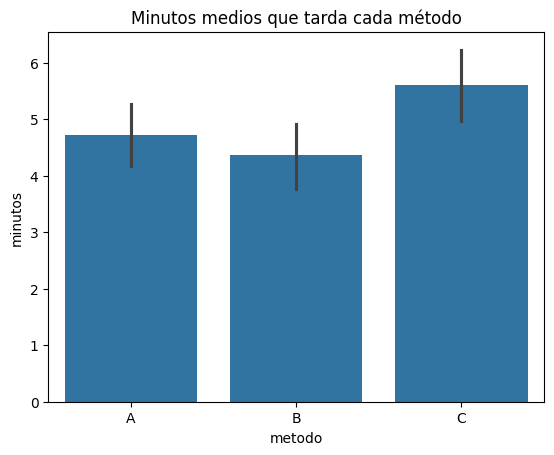

In [81]:
sns.barplot(x="metodo", y= "minutos", data= montaje)
plt.title("Minutos medios que tarda cada método")


#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [101]:
fluidos["temperatura"]=fluidos["temperatura"].astype(object)

In [102]:
fluidos.head(2)

,temperatura,densidad
0,100,21.790655
1,100,21.725900


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?


Por el diseño del propio experimento, ya se confirma la independencia

In [103]:
lista_metodos= fluidos["temperatura"].unique().tolist()


for indice, fluido in enumerate(lista_metodos):
    normalizale = fluidos[fluidos["temperatura"] == fluido]["densidad"]
    loc, scale = stats.norm.fit(normalizale) # Normalizamos para que devuelva un p-value 
    _, p_value = stats.kstest(normalizale, 'norm',args=(loc,scale))
    resultado = p_value > 0.05
    print(f"la densidad con una temperatura de {fluido} sigue una distribución normal según el test de Kolmogorov-Smirnov.{resultado}")

la densidad con una temperatura de 100 sigue una distribución normal según el test de Kolmogorov-Smirnov.True
la densidad con una temperatura de 125 sigue una distribución normal según el test de Kolmogorov-Smirnov.True
la densidad con una temperatura de 150 sigue una distribución normal según el test de Kolmogorov-Smirnov.True
la densidad con una temperatura de 175 sigue una distribución normal según el test de Kolmogorov-Smirnov.True


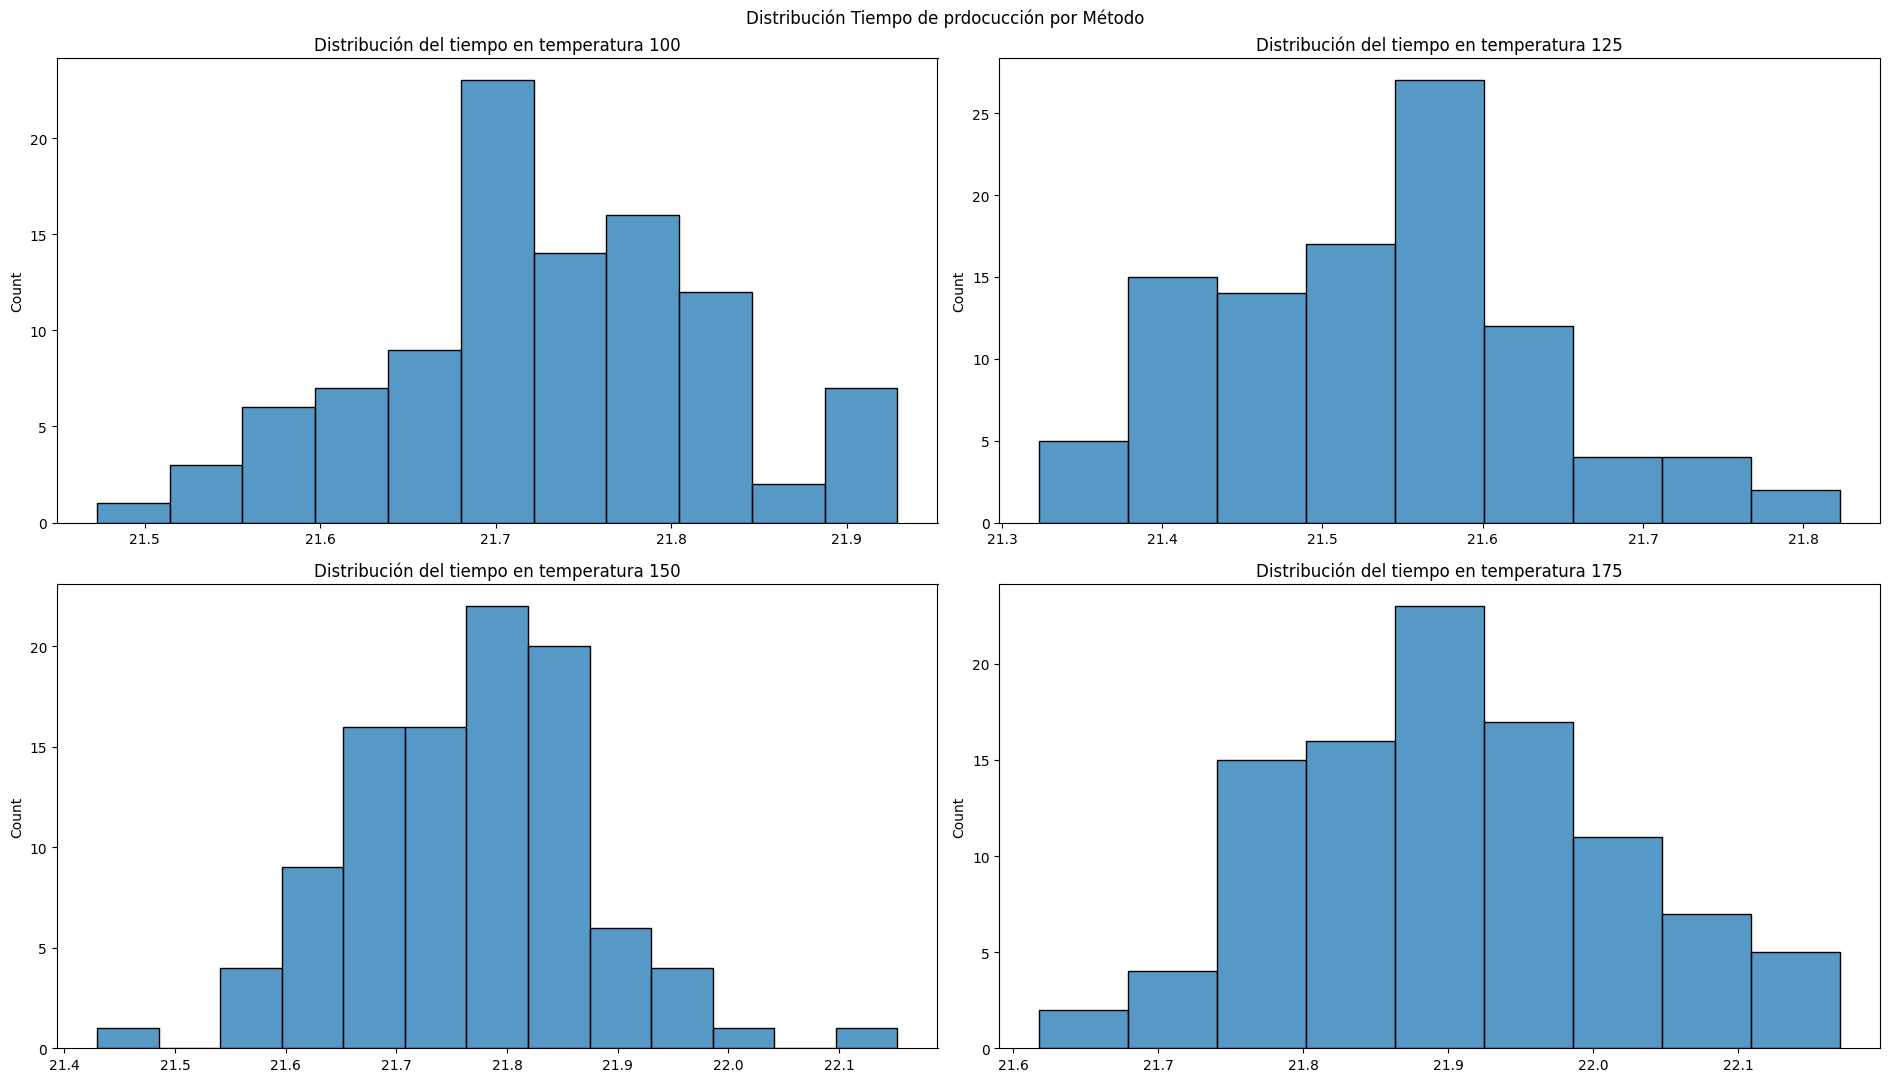

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 11))
axes = axes.flat  #Esto es para solo tener que meter un indice en lugar de dos (me lo hace de segido pero me lo sigue enseñando en 4x4)
lista_metodos= fluidos["temperatura"].unique().tolist()


for indice, fluido in enumerate(lista_metodos):
    sns.histplot(x="densidad", data= fluidos[fluidos["temperatura"]== fluido], ax=axes[indice])
    axes[indice].set_title(f"Distribución del tiempo en temperatura {fluido}")
    axes[indice].set_xlabel("")



if len(lista_metodos) % 2 != 0:
    fig.delaxes(axes[-1])           #esto es por si es un número impar de columnas para eliminar la que se quedaría vacía 

fig.suptitle("Distribución Tiempo de prdocucción por Método")
plt.tight_layout()
plt.show()

Dado que el p-value > 0,05 , no hay evidencia suficiente para rechazar la hipótesis nula. Esto quiere decir (dado que nuestra hipótesis nula es que la distribución sea normal) que la distribución de la densidad es normal para todoas las temperaturas. Ahora que lo sabemos, procededmos a comprobar la homocedasticidad con el test de levene.

In [105]:

unicos=fluidos["temperatura"].unique()   #lista de grupos
for grupo in unicos:
    montaje_metrica= fluidos[fluidos["temperatura"]== grupo]["densidad"]
    globals()[grupo] = montaje_metrica                                   #globals permite poner un parametro de una funcion en la variable a definir (de normal no se puede)
                                                                    #basicamente el globals lo empaqueta en un especie de diccionario en la que lo unico que se almacena en unicos (lista_grupo) son los nombres A B y C


print(stats.levene(*[globals()[var] for var in unicos]))                  #al desempaquetar, de la A obtenemos sus estadisticos el * es para quitar la lista


LeveneResult(statistic=np.float64(1.3647908525254946), pvalue=np.float64(0.25311302633232835))


Dado que el p-value > 0,05 , no hay evidencia suficiente para rechazar la hipótesis nula. Esto quiere decir que dado que nuestra hipótesis nula es que se cumpla el supuesto de homocedasticidad.Confirmemos que es homocedástico.

2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?


In [106]:
#Aqui supongo que tengo que hacer un anova ya que tengo que hacer un contraste de hipotesis de 4

unicos=fluidos["temperatura"].unique()   #lista de grupos
for grupo in unicos:
    montaje_metrica= fluidos[fluidos["temperatura"]== grupo]["densidad"]
    globals()[grupo] = montaje_metrica                                  

print(stats.f_oneway(*[globals()[var] for var in unicos]))                 


F_onewayResult(statistic=np.float64(212.84277610615817), pvalue=np.float64(3.327798065119595e-82))


Text(0.5, 1.0, 'Densidad a cada Temperatura')

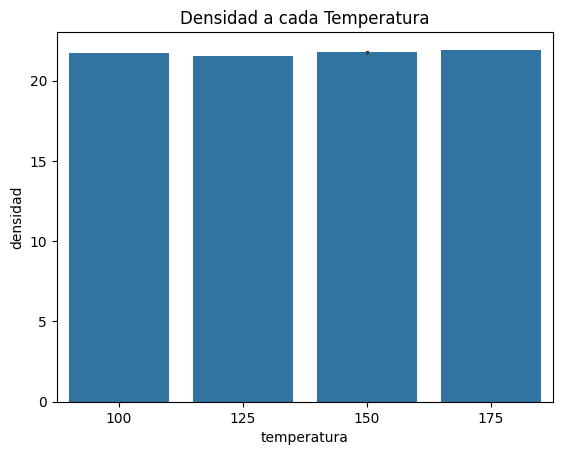

In [107]:
sns.barplot(x="temperatura", y= "densidad", data= fluidos)
plt.title("Densidad a cada Temperatura")


Dado que el p-value es < 0,05 , no hay evidencia suficiente para aceptar la hipótesis nula (Nuestra hipótesis nula es que la diferencia en la densidad de las 4 temperaturas era = 0). Por ello podemos decir que si que existen diferencias en las densidades dependiendo de la temperatura.

3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [109]:
grupo1 = fluidos[fluidos["temperatura"].isin([100, 125])]["densidad"]
grupo2 = fluidos[fluidos["temperatura"].isin([150, 175])]["densidad"]
print(stats.ttest_ind(grupo1, grupo2))

TtestResult(statistic=np.float64(-15.129677894969593), pvalue=np.float64(3.563849634924047e-41), df=np.float64(398.0))


Dado que el p-value es < 0,05 , no hay evidencia suficiente para aceptar la hipótesis nula (Nuestra hipótesis nula es que la diferencia en la densidad de las 4 temperaturas era = 0). Por ello podemos decir que si que existen diferencias en las densidades entre esos dos grupos de temperaturas.

Text(0.5, 1.0, 'Densidad a cada Temperatura')

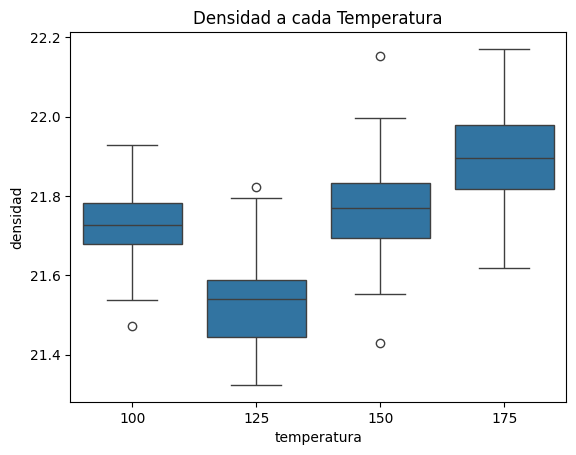

In [111]:
sns.boxplot(x="temperatura", y= "densidad", data= fluidos)
plt.title("Densidad a cada Temperatura")

EN CONCLUSIÓN: Gracias al boxplot y fijándonos en las medianas, podemos decir que efectivamente las temperaturas 100 y 125 tienen en promedio una menor densidad en el fluido en comparación con las temperaturas 150 y 175.